# ML LAB-03


Akhila Tallam

21BDA

Assignment -01


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression 
from sklearn import metrics


In [2]:
data=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Fish.csv")

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
def plot_conf(data, f):
    data = data.copy()
    print(f'Weight {f}: ',data[f].nunique())
    print(f'Height {f}: ', data[f].unique())
    plt.figure(figsize = (15, 7))
    plt.title(f'Distribution of {f} By The Weight and Height')
    sns.barplot(
        x = f,
        y = 'Species',
        data = data
    )
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Width')
    plt.show()

In [9]:
conf = ['Length1','Length2','Length3']

Weight Length1:  116
Height Length1:  [23.2 24.  23.9 26.3 26.5 26.8 27.6 28.5 28.4 28.7 29.1 29.5 29.4 30.4
 30.9 31.  31.3 31.4 31.5 31.8 31.9 32.  32.7 32.8 33.5 35.  36.2 37.4
 38.  12.9 16.5 17.5 18.2 18.6 19.  19.1 19.4 20.4 20.5 21.  21.1 22.
 22.1 23.6 25.  24.1 25.6 33.7 37.3 13.5 14.3 16.3 18.4 19.8 21.2 23.
  7.5 12.5 13.8 15.  15.7 16.2 16.8 17.2 17.8 19.3 20.  20.7 21.5 22.6
 23.5 25.2 25.4 25.9 26.9 27.8 30.5 32.5 34.  34.5 34.6 36.5 36.6 36.9
 37.  37.1 39.  39.8 40.1 40.2 41.1 30.  31.7 34.8 35.5 36.  40.  42.
 43.2 44.8 48.3 52.  56.  59.   9.3 10.  10.1 10.4 10.7 10.8 11.3 11.4
 11.5 11.7 12.1 13.2]


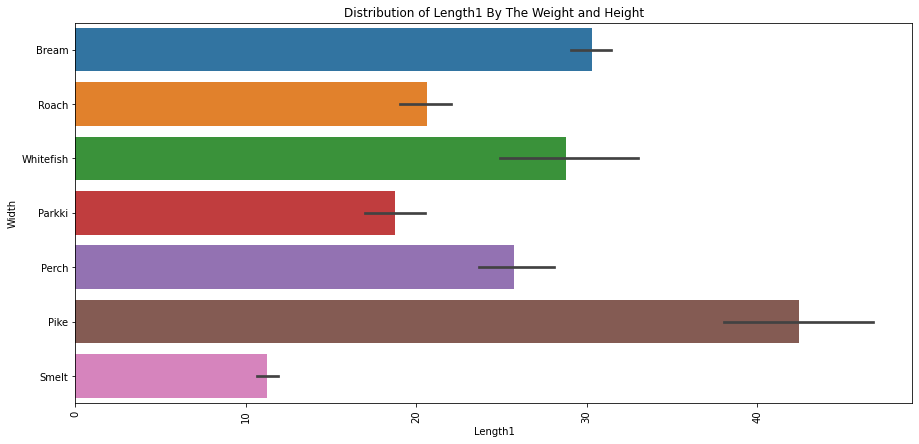

Weight Length2:  93
Height Length2:  [25.4 26.3 26.5 29.  29.7 30.  30.7 31.  31.5 32.  33.  33.5 34.  34.5
 35.  36.  37.  38.5 39.5 41.  14.1 18.2 18.8 19.8 20.  20.5 20.8 21.
 22.  22.5 24.  23.4 23.5 25.2 26.  27.  31.7 28.  36.4 40.  14.7 15.5
 17.7 19.  20.7 21.5 23.  25.   8.4 13.7 15.  16.2 17.4 18.  18.7 19.6
 21.3 22.7 24.6 25.6 27.3 27.5 28.7 32.8 36.5 39.  42.  43.  43.5 44.
 32.3 37.3 38.  42.5 45.  46.  48.  51.7 56.  60.  63.4  9.8 10.5 10.6
 11.  11.2 11.3 11.8 12.  12.2 12.4 13.  14.3]


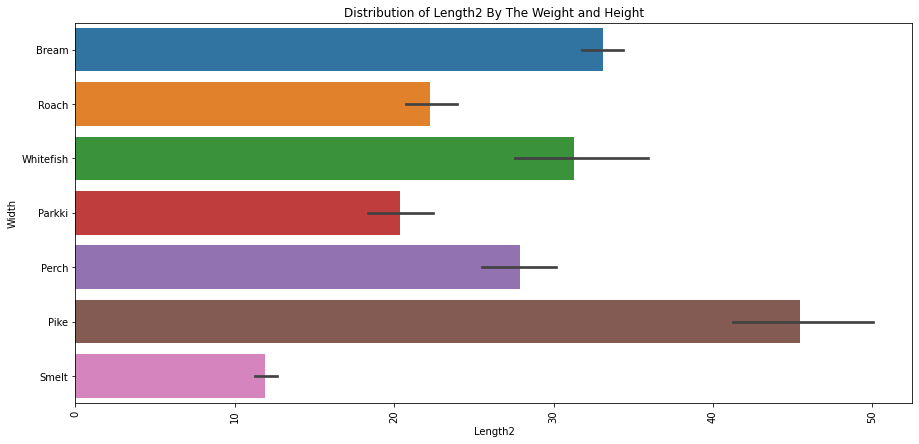

Weight Length3:  124
Height Length3:  [30.  31.2 31.1 33.5 34.  34.7 34.5 35.  35.1 36.2 36.4 37.3 37.2 38.3
 38.5 38.6 38.7 39.5 39.2 39.7 40.6 40.5 40.9 41.5 41.6 42.6 44.1 44.
 45.3 45.9 46.5 16.2 20.3 21.2 22.2 22.8 23.1 23.7 24.7 24.3 25.3 25.
 27.2 26.7 26.8 27.9 29.2 30.6 28.7 29.3 30.8 39.6 43.5 16.5 17.4 19.8
 21.3 22.4 23.2 24.1 25.8 28.  29.   8.8 14.7 16.  17.2 18.5 19.2 19.4
 20.2 20.8 21.  22.5 23.5 24.  24.2 24.5 25.5 26.2 26.5 27.  28.9 29.4
 30.1 31.6 36.5 39.  39.4 39.3 41.4 41.3 42.3 42.5 42.4 44.6 45.2 45.5
 46.  46.6 34.8 37.8 38.8 39.8 41.  45.8 48.  48.7 51.2 55.1 59.7 64.
 68.  10.8 11.6 12.  12.4 12.6 13.1 13.2 13.4 13.5 13.8 15.2]


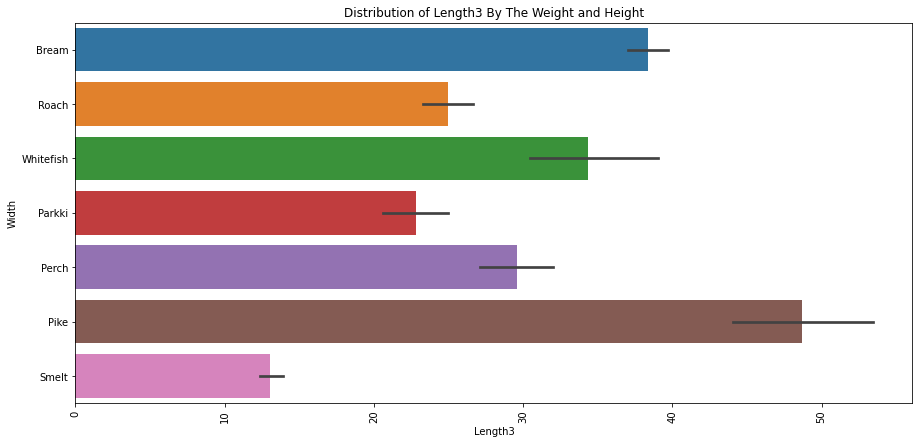

In [10]:
for f in conf:
    plot_conf(data,f)

In [11]:
x='Species'
y='Width'

<AxesSubplot:xlabel='Width', ylabel='Species'>

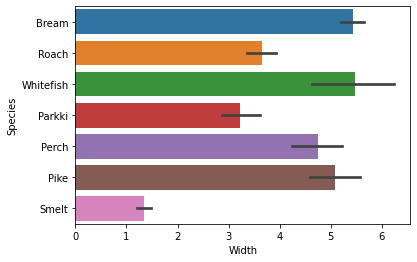

In [12]:
sns.barplot(data=data, y=x,x=y,linewidth=5.6)

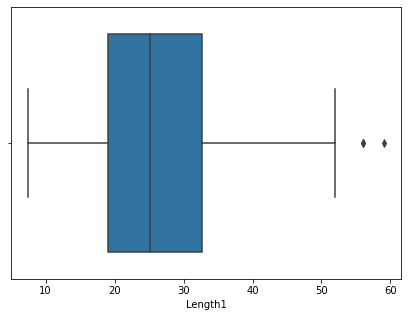

In [13]:
fig, ax  = plt.subplots(figsize=(7,5))
ax=sns.boxplot(x='Length1', data=data)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


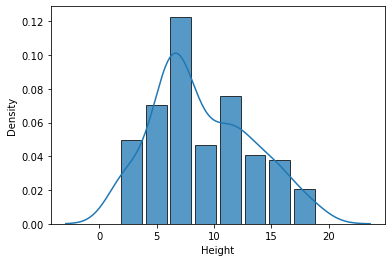

In [14]:
sns.distplot(data['Height'], hist_kws={'rwidth':0.85, 'edgecolor':'black', 'alpha':0.75});

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


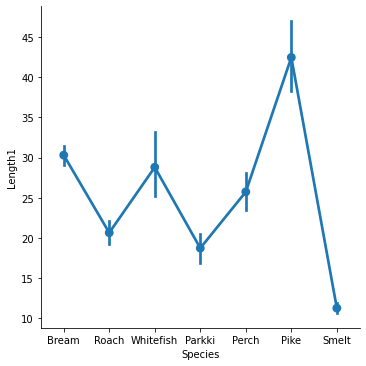

In [15]:
sns.factorplot('Species','Length1',data=data)
plt.show()

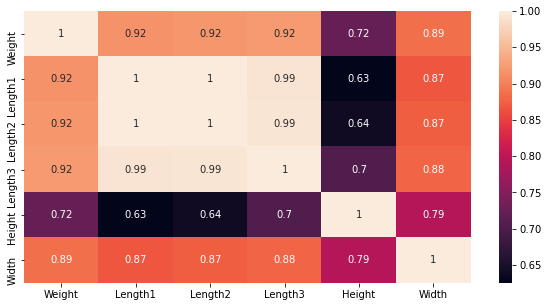

In [16]:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [17]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [18]:
pd.crosstab([data.Species],[data.Width,data.Height],margins=True).style.background_gradient(cmap='summer_r')

Text(0.5, 0, 'diagonal width in cm')

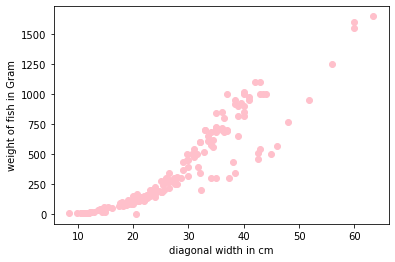

In [19]:
y = data.Weight.values.reshape(-1,1)
x = data.Length2.values.reshape(-1,1)

plt.scatter(x,y,color='pink')
plt.ylabel("weight of fish in Gram")
plt.xlabel("diagonal width in cm")

In [20]:
data.head(6)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274


Perch        35.220126
Bream        22.012579
Roach        12.578616
Pike         10.691824
Smelt         8.805031
Parkki        6.918239
Whitefish     3.773585
Name: Species, dtype: float64


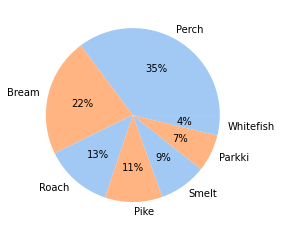

In [21]:
pie = data['Species'].value_counts(normalize = True)*100
print(pie)
colors = sns.color_palette('pastel')[0:2]
plt.pie(pie.values,labels = pie.index,colors=colors,autopct='%.0f%%')
plt.show()

In [22]:
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


<AxesSubplot:xlabel='Height', ylabel='Species'>

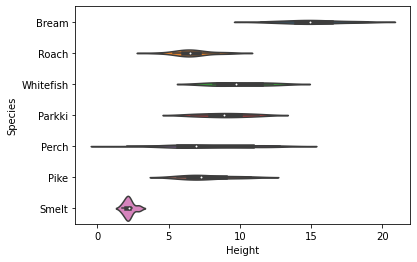

In [23]:
sns.violinplot(data=data,x=data['Height'],y=data['Species'])

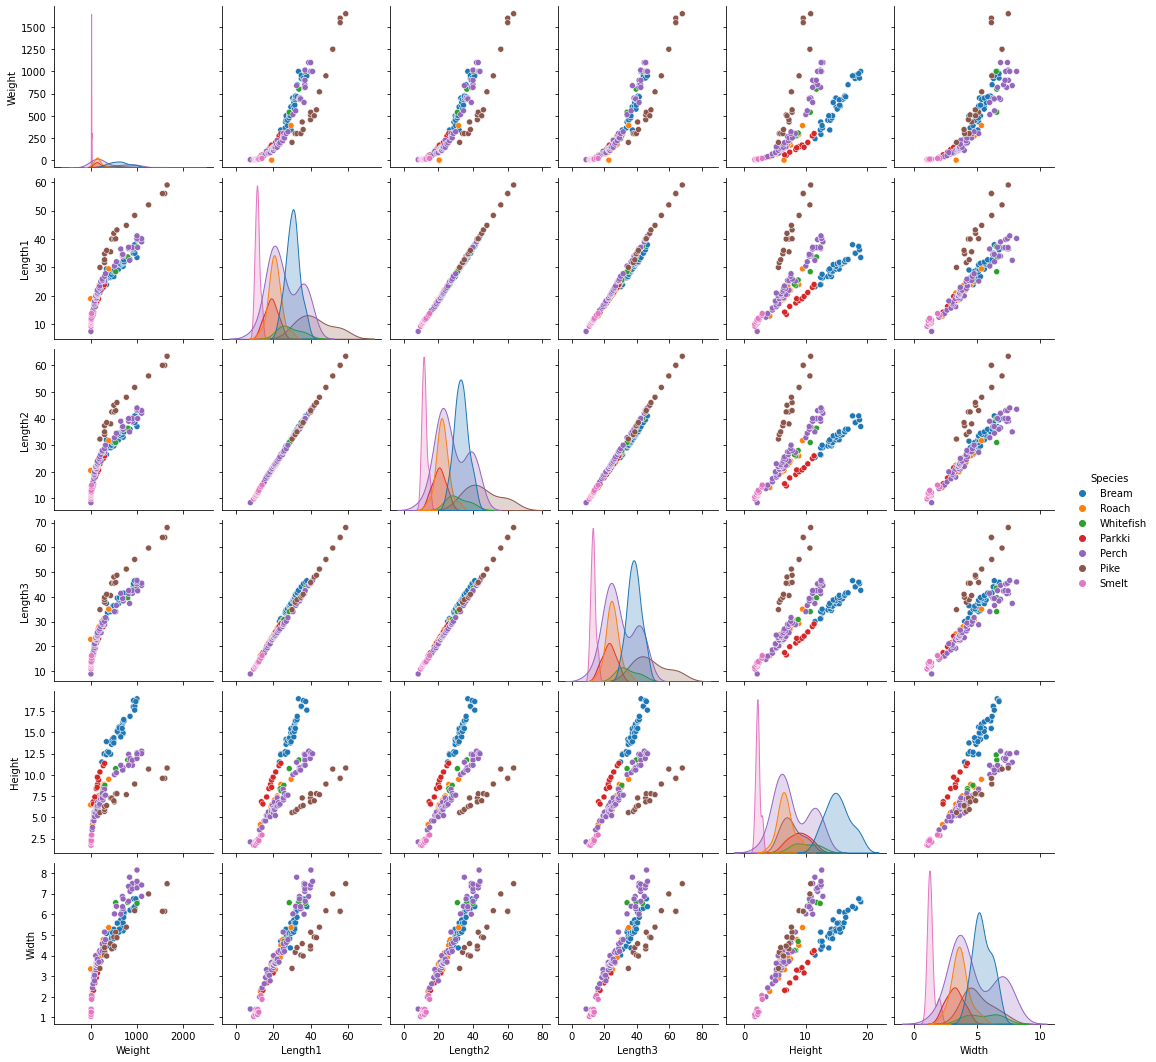

In [24]:
sns.pairplot(data, hue="Species")

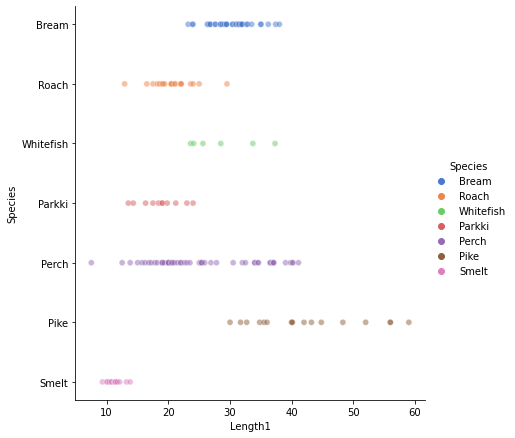

In [25]:
sns.relplot(x=data['Length1'], y=data['Species'], hue="Species",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

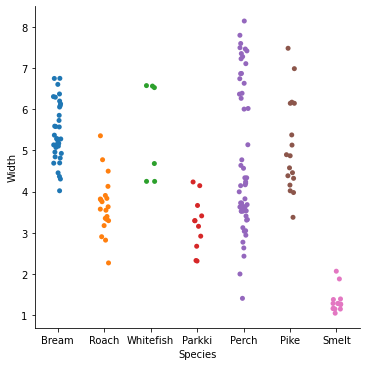

In [26]:
sns.catplot(x = "Species", y = "Width",data =data)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Height', ylabel='Species'>

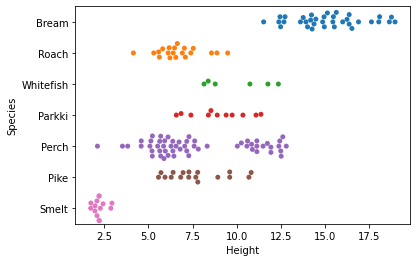

In [27]:
sns.swarmplot(x = "Height", y = "Species",data =data)

Logistic Regression

In [28]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [29]:
data.corrwith(data['Height'],axis = 0).sort_values(ascending=False)

Height     1.000000
Width      0.792881
Weight     0.724345
Length3    0.703409
Length2    0.640441
Length1    0.625378
dtype: float64

In [30]:
# dependent and independent variables:
X= data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y= data['Species']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [32]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state =42)
logistic_classifier.fit(X_train,y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [33]:
logistic_classifier.score(X_test,y_test)

0.78125

In [34]:
y_p=logistic_classifier.predict(X_test)
y_p

array(['Bream', 'Pike', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream',
       'Bream', 'Perch', 'Perch', 'Smelt', 'Bream', 'Perch', 'Bream',
       'Bream', 'Roach', 'Bream', 'Pike', 'Roach', 'Bream', 'Perch',
       'Bream', 'Bream', 'Perch', 'Smelt', 'Roach', 'Bream', 'Perch',
       'Bream', 'Bream', 'Pike', 'Perch'], dtype=object)

In [35]:
print('intercept ', logistic_classifier.intercept_[0])

intercept  -0.011935387264848066


In [36]:
print('classes', logistic_classifier.classes_)
pd.DataFrame({'coeff': logistic_classifier.coef_[0]}, 
             index=X.columns)

classes ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


,coeff
Weight,0.145281
Length1,-0.314787
Length2,-0.288041
Length3,0.057454
Height,0.686830
Width,-0.027754


In [37]:

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score

Assignment -02

a)Confusion Matrix A confusion matrix is a table that shows how well a classification model (or "classifier") performs on a set of test data for which the true values are known. When comparing predicted and actual values, four different columns are produced: true positive (TP), false positive (FP), false negative (FN) and true negative (TN).

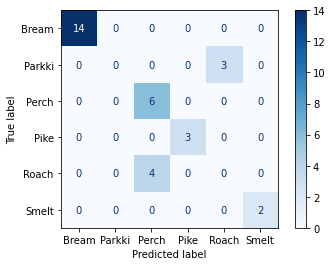

In [38]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logistic_classifier, X_test, y_test, cmap=plt.cm.Blues)

From the above diagram, we can see that:

True Negative (TN) = 14

False Positives (FP) = 3

False Negatives (FN) = 4

True Positives (FN) = 2

The performance of our model cannot be determined simply by looking at the matrix. So we go for checking the accuracy. The accuracy is used to determine the percentage of values that are correctly categorised. It indicates how frequently our classifier is correct. It's the total of all true values divided by the total of all true values.

b) Precision The ratio of the total number of successfully classified positive classes divided by the total number of anticipated positive classes is known as precision. Or, out of all the positive predictive classes, how much did we get right? The level of precision should be high.

 
c) Recall It's used to figure out how well the model can predict positive values. "How frequently does the model correctly forecast positive values?" It's the total number of genuine positives divided by the total number of true positives.

d) F1 Score It's the harmonic mean of the two variables Recall and Precision. It's useful when you need to account for both precision and recall.

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

In [40]:
l = ['micro', 'macro', 'weighted']
scores = []
for i in l:
    scores.append(f1_score(y_test, y_p, average=i))
scores

[0.78125, 0.625, 0.734375]

In [41]:
accuracy = metrics.accuracy_score(y_test, y_p)
print("Accuracy: %.3f" % accuracy)



Accuracy: 0.781


In [42]:
print(' Precision: {:.2f}'.format(precision_score(y_test, y_p, average='micro')))
print(' Recall: {:.2f}'.format(recall_score(y_test, y_p, average='micro')))
print(' F1-score: {:.2f}\n'.format(f1_score(y_test, y_p, average='micro')))

 Precision: 0.78
 Recall: 0.78
 F1-score: 0.78



e) Sensitivity (also called the true positive rate, or the recall in some fields) measures the proportion of actual positives which are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition), and is complementary to the false negative rate. Sensitivity= true positives/(true positive + false negative)

f) Specificity (also called the true negative rate) measures the proportion of negatives which are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition), and is complementary to the false positive rate. Specificity=true negatives/(true negative + false positives)

g) Misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.

h) ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
i) AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [43]:
print("Misclassification rate: ",np.mean(y_p != y_test)*100)

Misclassification rate:  21.875


In [44]:
pred_prob1 = logistic_classifier.predict_proba(X_test)

In [53]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


In [54]:
from sklearn.metrics import roc_auc_score

# auc scores
auc = roc_auc_score(y_test, pred_prob1[:,1])


print("auc score : " , auc)

ValueError: multi_class must be in ('ovo', 'ovr')

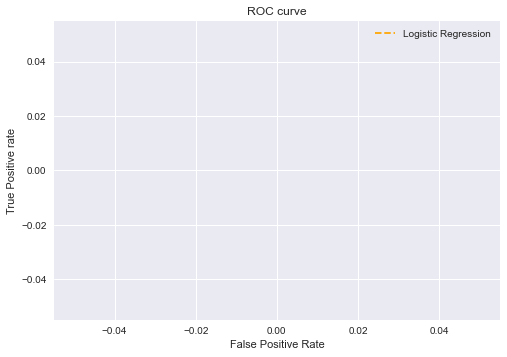

In [50]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();